**Dataset Sonar**

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#os.chdir('drive/My Drive/BCML')
#os.listdir('.')

['Untitled0.ipynb',
 'iris.csv',
 'heart.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv']

In [6]:
dataset = pd.read_csv('sonar.csv')
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [8]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,

In [9]:
dataset['Class'].value_counts()

0    111
1     97
Name: Class, dtype: int64

In [10]:
dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

In [ ]:
#sb.pairplot(dataset, hue='Class', size=3)
#plt.show()

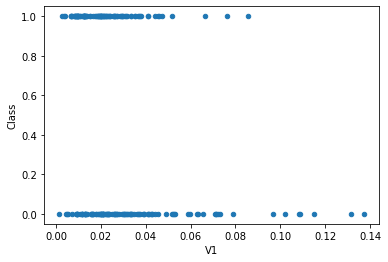

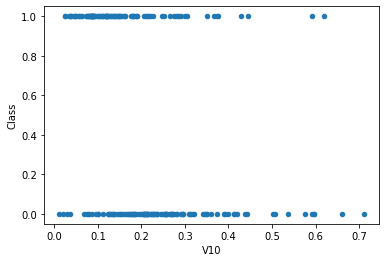

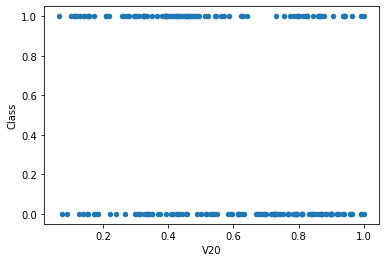

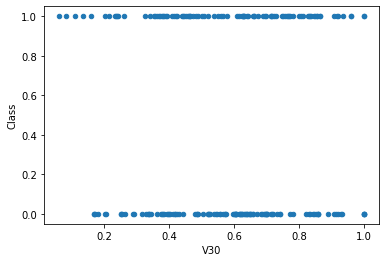

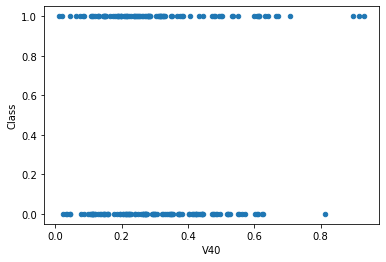

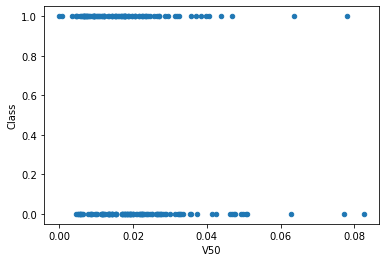

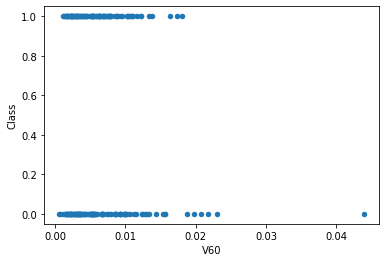

In [11]:
V = ('V1', 'V10', 'V20', 'V30', 'V40', 'V50', 'V60')
for i in V:
  dataset.plot(kind="scatter", x=(i), y="Class")
  plt.show()

In [12]:
feature = dataset.drop(['Class'], axis=1)
label = dataset['Class']

In [13]:
# Scaling data
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson', standardize=True)
#scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values)

In [104]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.10, random_state=29)

In [105]:
# Menyeimbangkan data

#from imblearn.over_sampling import SMOTE
#smt = SMOTE()
#feature_train, label_train = smt.fit_sample(feature_train, label_train)
#np.bincount(label_train)

In [106]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

log_reg = LogisticRegression(tol=0.25)
log_reg.fit(feature_train, label_train)

predictions = log_reg.predict(feature_train)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(log_reg.score(feature_train, label_train))) # .score() -> Accuracy
print(f1_score(label_train, predictions, average='macro'))
print(precision_score(label_train, predictions, average='macro'))
print(recall_score(label_train, predictions, average='macro'))
predictions = log_reg.predict(feature_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(feature_test, label_test))) # .score() -> Accuracy
print(f1_score(label_test, predictions, average='macro'))
print(precision_score(label_test, predictions, average='macro'))
print(recall_score(label_test, predictions, average='macro'))

Accuracy of logistic regression classifier on train set: 0.92
0.9195560526542201
0.9198232323232323
0.9193418940609952
Accuracy of logistic regression classifier on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846


In [107]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(50, 150 ,25):
  rf_model = RandomForestClassifier(n_estimators=(i), random_state=(20), bootstrap=True, max_features = "sqrt")
  rf_model.fit(feature_train, label_train)
  predictions = rf_model.predict(feature_train)
  print('Accuracy of Random Forest with Estimators = ' +str(i)+ ' on train set: {:.2f}'.format(rf_model.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = rf_model.predict(feature_test)
  print('Accuracy of Random Forest with Estimators = ' +str(i)+ ' on test set: {:.2f}'.format(rf_model.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy of Random Forest with Estimators = 50 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 50 on test set: 0.81
0.7980769230769231
0.7980769230769231
0.7980769230769231

Accuracy of Random Forest with Estimators = 75 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 75 on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846

Accuracy of Random Forest with Estimators = 100 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 100 on test set: 0.81
0.7980769230769231
0.7980769230769231
0.7980769230769231

Accuracy of Random Forest with Estimators = 125 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 125 on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846



In [108]:
# SVC
from sklearn.svm import SVC
kern = ('poly','linear', 'rbf')
for i in kern:
  classifier_poly = SVC(kernel = (i))
  classifier_poly.fit(feature_train, label_train)
  predictions = classifier_poly.predict(feature_train)
  print('Accuracy of SVC ' +str(i)+ ' classifier on train set: {:.2f}'.format(classifier_poly.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = classifier_poly.predict(feature_test)
  print('Accuracy of SVC ' +str(i)+ ' classifier on test set: {:.2f}'.format(classifier_poly.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy of SVC poly classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of SVC poly classifier on test set: 0.90
0.8990384615384616
0.8990384615384616
0.8990384615384616

Accuracy of SVC linear classifier on train set: 0.95
0.9464490263459335
0.9461996336996337
0.9469158449896813
Accuracy of SVC linear classifier on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846

Accuracy of SVC rbf classifier on train set: 0.99
0.994642601346512
0.9944444444444445
0.9948979591836735
Accuracy of SVC rbf classifier on test set: 0.86
0.851764705882353
0.8472222222222222
0.8605769230769231



In [109]:
# LinearSVC
from sklearn import svm
classifier_linear2 = svm.LinearSVC()
classifier_linear2.fit(feature_train, label_train)

predictions = classifier_linear2.predict(feature_train)
print('Accuracy of SVC (Linear) classifier on train set: {:.2f}'.format(classifier_linear2.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = classifier_linear2.predict(feature_test)
print('Accuracy of SVC (Linear) classifier on test set: {:.2f}'.format(classifier_linear2.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of SVC (Linear) classifier on train set: 0.95
0.9517336315925321
0.952020202020202
0.9515019490942445
Accuracy of SVC (Linear) classifier on test set: 0.81
0.8055555555555555
0.8045454545454545
0.8221153846153846


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [110]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 20, 2):
  knn = KNeighborsClassifier(n_neighbors=(i), metric='canberra') #Default k = 5
  knn.fit(feature_train, label_train)
  
  predictions = knn.predict(feature_train)
  print('Accuracy KNN classifier with k = ' +str(i)+' on train set: {:.2f}'.format(knn.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = knn.predict(feature_test)
  print('Accuracy KNN classifier with k = ' +str(i)+' on test set: {:.2f}'.format(knn.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy KNN classifier with k = 1 on train set: 1.00
1.0
1.0
1.0
Accuracy KNN classifier with k = 1 on test set: 1.00
1.0
1.0
1.0

Accuracy KNN classifier with k = 3 on train set: 0.93
0.9243527508090615
0.9317862165963431
0.9223801880302682
Accuracy KNN classifier with k = 3 on test set: 0.86
0.851764705882353
0.8472222222222222
0.8605769230769231

Accuracy KNN classifier with k = 5 on train set: 0.90
0.8974455188338866
0.9033294392523364
0.895838110525109
Accuracy KNN classifier with k = 5 on test set: 0.86
0.851764705882353
0.8472222222222222
0.8605769230769231

Accuracy KNN classifier with k = 7 on train set: 0.89
0.8870675524113536
0.8892741562644475
0.8861499656042192
Accuracy KNN classifier with k = 7 on test set: 0.76
0.7407407407407407
0.75
0.7355769230769231

Accuracy KNN classifier with k = 9 on train set: 0.85
0.8490196078431372
0.8533659445609132
0.8478559963311167
Accuracy KNN classifier with k = 9 on test set: 0.81
0.7980769230769231
0.7980769230769231
0.798076923076923

In [111]:
from sklearn.neighbors import RadiusNeighborsClassifier

for i in np.arange(40.0, 50.0, 1):
  rn = RadiusNeighborsClassifier(radius=(i), metric='canberra') #Default k = 5
  rn.fit(feature_train, label_train)
  predictions = rn.predict(feature_train)
  print('Accuracy RN classifier with radius = ' +str(i)+' on train set: {:.2f}'.format(rn.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = rn.predict(feature_test)
  print('Accuracy RN classifier with radius = ' +str(i)+' on test set: {:.2f}'.format(rn.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy RN classifier with radius = 40.0 on train set: 0.75
0.7410811607011342
0.7644628099173554
0.7421462967209356
Accuracy RN classifier with radius = 40.0 on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846

Accuracy RN classifier with radius = 41.0 on train set: 0.76
0.7589076418190341
0.7774502579218865
0.7590002293052052
Accuracy RN classifier with radius = 41.0 on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846

Accuracy RN classifier with radius = 42.0 on train set: 0.76
0.7580569277816984
0.780410447761194
0.7584842925934419
Accuracy RN classifier with radius = 42.0 on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846

Accuracy RN classifier with radius = 43.0 on train set: 0.78
0.7764266759980171
0.7905797101449276
0.7758541618894749
Accuracy RN classifier with radius = 43.0 on test set: 0.71
0.6971153846153846
0.6971153846153846
0.6971153846153846

Accuracy RN classifier with radius = 44.0 on train set: 0.79
0.7822035872350339
0.7950012016342225


In [112]:
# SGD
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

sgdc.fit(feature_train, label_train)

predictions = sgdc.predict(feature_train)
print('Accuracy of SGD classifier on train set: {:.2f}'.format(sgdc.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = sgdc.predict(feature_test)
print('Accuracy of SGD classifier on test set: {:.2f}'.format(sgdc.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of SGD classifier on train set: 0.86
0.8602873563218391
0.861764705882353
0.8596078880990599
Accuracy of SGD classifier on test set: 0.76
0.7529411764705882
0.75
0.7596153846153846


In [113]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(feature_train, label_train)

predictions = tree.predict(feature_train)
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(tree.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = tree.predict(feature_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of Decision Tree classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of Decision Tree classifier on test set: 0.81
0.8090909090909091
0.8333333333333333
0.8461538461538461


In [114]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
bay = GaussianNB()

bay.fit(feature_train, label_train)

predictions = bay.predict(feature_train)
print('Accuracy of Gaussian Naive Bayes classifier on train set: {:.2f}'.format(bay.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = bay.predict(feature_test)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(bay.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of Gaussian Naive Bayes classifier on train set: 0.79
0.7905814788226848
0.7913884411696983
0.7901857372162349
Accuracy of Gaussian Naive Bayes classifier on test set: 0.67
0.6636155606407322
0.6727272727272727
0.6826923076923077


In [115]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(feature_train, label_train)

predictions = ada.predict(feature_train)
print('Accuracy of SVC AdaBoost classifier on train set: {:.2f}'.format(ada.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = ada.predict(feature_test)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(ada.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of SVC AdaBoost classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of AdaBoost classifier on test set: 0.86
0.851764705882353
0.8472222222222222
0.8605769230769231


In [116]:
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
gau = GaussianProcessClassifier()
gau.fit(feature_train, label_train)

predictions = gau.predict(feature_train)
print('Accuracy of Gaussian Process classifier on train set: {:.2f}'.format(gau.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = gau.predict(feature_test)
print('Accuracy of Gaussian Process classifier on test set: {:.2f}'.format(gau.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of Gaussian Process classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of Gaussian Process classifier on test set: 0.95
0.9505882352941177
0.9444444444444444
0.9615384615384616


In [117]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
quad = QuadraticDiscriminantAnalysis()

quad.fit(feature_train, label_train)

predictions = quad.predict(feature_train)
print('Accuracy of QDA classifier on train set: {:.2f}'.format(quad.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = quad.predict(feature_test)
print('Accuracy of QDA classifier on test set: {:.2f}'.format(quad.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of QDA classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of QDA classifier on test set: 0.90
0.9027777777777778
0.9
0.9230769230769231


In [118]:
# Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mul = MLPClassifier(learning_rate_init=0.10, hidden_layer_sizes=120, random_state=60)

mul.fit(feature_train, label_train)

predictions = mul.predict(feature_train)
print('Accuracy of MLP classifier on train set: {:.2f}'.format(mul.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = mul.predict(feature_test)
print('Accuracy of MLP classifier on test set: {:.2f}'.format(mul.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of MLP classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of MLP classifier on test set: 0.86
0.851764705882353
0.8472222222222222
0.8605769230769231


**Kesimpulan**
Pada dataset Sonar ini, KNN Classifier menghasilkan akurasi tertinggi yaitu 1.0 dengan k=1 dan metric = "canberra". 

Scaling data dengan menggunakan Power Transformer method Yeo-Johnson, dan pembagian data training : test = 90% : 10% dan random_state=29.